In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
srcdf = pd.read_csv('/Case_2_loan_Default_classification/loan.csv')

In [3]:
pd.set_option('display.max_columns', 41)

In [4]:
srcdf.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
srcdf.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

## Check for NULL Values

In [6]:
srcdf.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

## Replacing . with _ in the column names as it is not being recognised as column names in pandas library

In [7]:
tmpColumns = {}
tmpcolumns = list(srcdf.columns)
for i in srcdf.columns:
    if ('.' in i):
        tmpColumns.update({tmpcolumns[tmpcolumns.index(i)]: i.replace('.','_')})

In [8]:
tmpColumns

{'Date.of.Birth': 'Date_of_Birth',
 'Employment.Type': 'Employment_Type',
 'PERFORM_CNS.SCORE': 'PERFORM_CNS_SCORE',
 'PERFORM_CNS.SCORE.DESCRIPTION': 'PERFORM_CNS_SCORE_DESCRIPTION',
 'PRI.NO.OF.ACCTS': 'PRI_NO_OF_ACCTS',
 'PRI.ACTIVE.ACCTS': 'PRI_ACTIVE_ACCTS',
 'PRI.OVERDUE.ACCTS': 'PRI_OVERDUE_ACCTS',
 'PRI.CURRENT.BALANCE': 'PRI_CURRENT_BALANCE',
 'PRI.SANCTIONED.AMOUNT': 'PRI_SANCTIONED_AMOUNT',
 'PRI.DISBURSED.AMOUNT': 'PRI_DISBURSED_AMOUNT',
 'SEC.NO.OF.ACCTS': 'SEC_NO_OF_ACCTS',
 'SEC.ACTIVE.ACCTS': 'SEC_ACTIVE_ACCTS',
 'SEC.OVERDUE.ACCTS': 'SEC_OVERDUE_ACCTS',
 'SEC.CURRENT.BALANCE': 'SEC_CURRENT_BALANCE',
 'SEC.SANCTIONED.AMOUNT': 'SEC_SANCTIONED_AMOUNT',
 'SEC.DISBURSED.AMOUNT': 'SEC_DISBURSED_AMOUNT',
 'PRIMARY.INSTAL.AMT': 'PRIMARY_INSTAL_AMT',
 'SEC.INSTAL.AMT': 'SEC_INSTAL_AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS': 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS': 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
 'AVERAGE.ACCT.AGE': 'AVERAGE_ACCT_AGE',
 'CREDIT.

In [9]:
srcdf = srcdf.rename(columns=tmpColumns)

In [10]:
srcdf.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

In [11]:
Description = ['Id- Will be excluded', 'Disbursed loan amount (Target value for case 3)', 'Asset cost', 'Total Value', 'Id- Will be excluded',
       'Id- Will be excluded', 'Id- Will be excluded', 'Id- Will be excluded', 'Id- Will be excluded',
       'Id- Will be excluded', 'MobileNo Given or not', 'Aadhar Given or not', 'PAN Given or not',
       'VoterID Given or not', 'Driving ID Given or not', 'Passport Given or not', 'Credit score',
       'No. of Accts', 'Primary Active Accts', 'Primary Overdue Accts',
       'Pimary Acc Bal', 'Primary sanctioned Amnt', 'Primary disbursed Amnt',
       'Secondary No. of Accts', 'Secondary Active Accts', 'Secondary Overdue Accts',
       'Secondary Acct Bal', 'Secondary Sanctioned Amnt', 'Secondary Disbursed Amnt',
       'Primary Instalment Amnt', 'Secondary Instalment Amnt', 'New Accts in last 6 months',
       'Delinquent Accts in last 6 months', 'No of Inquires',
       'loan_default (Target value for case 2)']

In [12]:
pd.DataFrame({'Variables' : srcdf.select_dtypes([np.number]).columns,'Data_type':srcdf.select_dtypes([np.number]).dtypes,
             'Description':Description})

,Variables,Data_type,Description
UniqueID,UniqueID,int64,Id- Will be excluded
disbursed_amount,disbursed_amount,int64,Disbursed loan amount (Target value for case 3)
asset_cost,asset_cost,int64,Asset cost
ltv,ltv,float64,Total Value
branch_id,branch_id,int64,Id- Will be excluded
supplier_id,supplier_id,int64,Id- Will be excluded
manufacturer_id,manufacturer_id,int64,Id- Will be excluded
Current_pincode_ID,Current_pincode_ID,int64,Id- Will be excluded
State_ID,State_ID,int64,Id- Will be excluded
Employee_code_ID,Employee_code_ID,int64,Id- Will be excluded


## Pre processing of Data

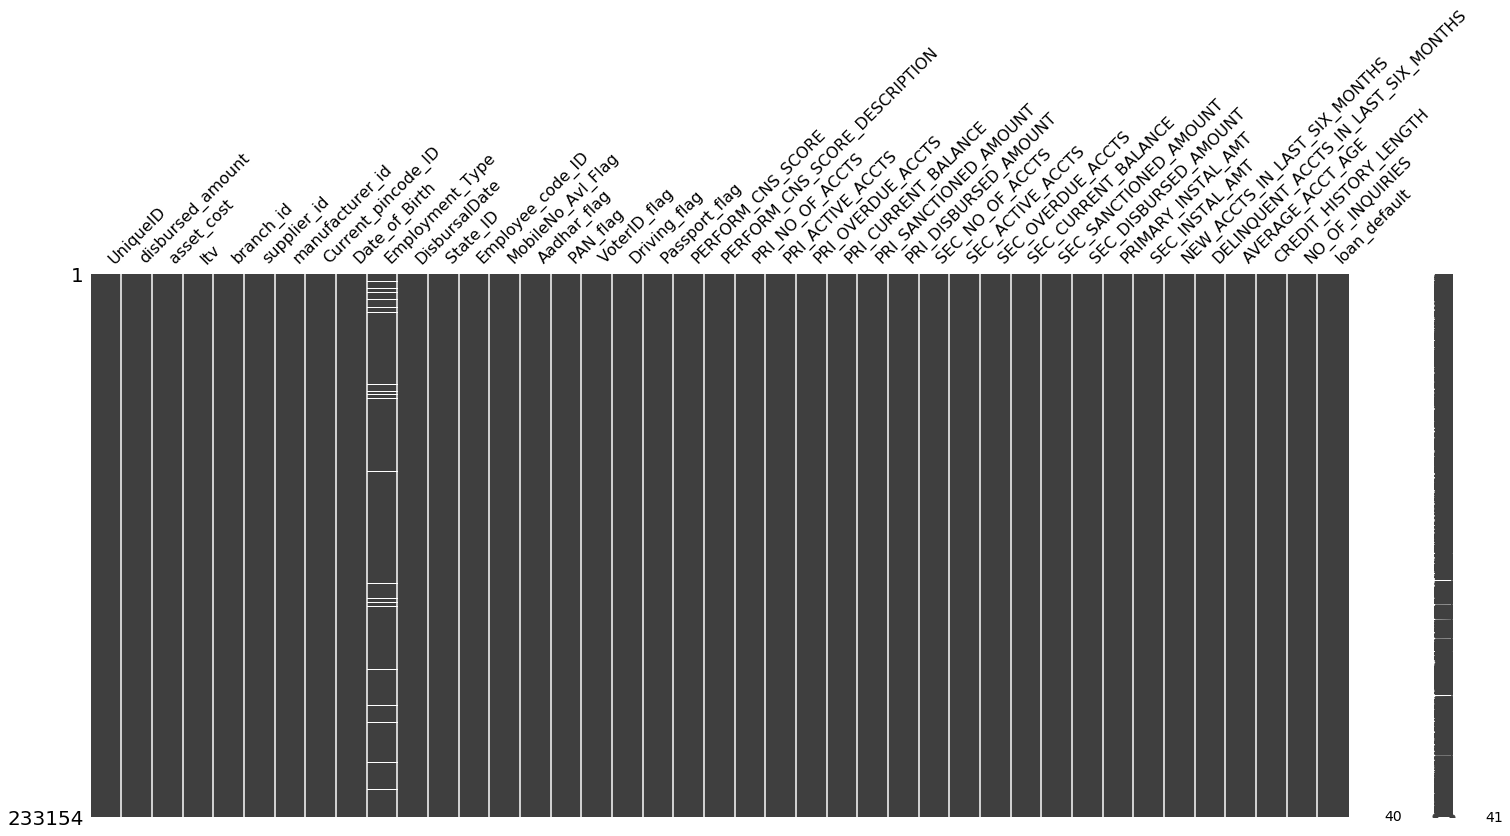

In [20]:
msno.matrix(srcdf)

## Exploratory Data Analysis

In [23]:
srcdf.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [24]:
hist_Columns = list(i for i in srcdf.select_dtypes([np.number]).columns if i in ['disbursed_amount','asset_cost',
                        'ltv','PERFORM_CNS_SCORE'])

In [25]:
np.log(srcdf['disbursed_amount']).value_counts()

10.786201    2140
10.883748    2125
10.845505    1992
10.825820    1960
10.919787    1887
             ... 
10.841696       1
10.942438       1
11.925982       1
10.823372       1
10.289430       1
Name: disbursed_amount, Length: 24565, dtype: int64

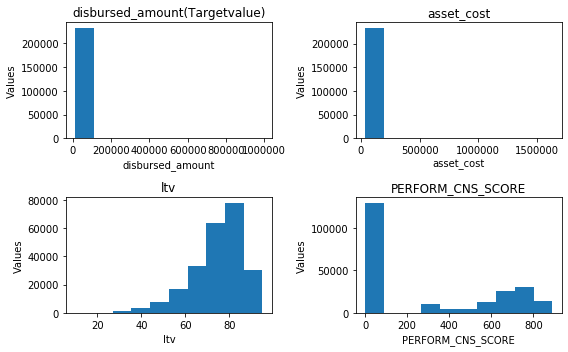

In [26]:
#Unbalanced Distribution
count=0
fig, axs = plt.subplots(2, 2, tight_layout=True,figsize=(8,5)) 
#plt.figure(figsize=(20,10))
for i in range(2):
    for j in range(2):
        if(hist_Columns[count]=='disbursed_amount'):
            axs[i,j].hist(srcdf[hist_Columns[count]])
            axs[i,j].set(title = hist_Columns[count]+'(Targetvalue)', xlabel= hist_Columns[count],ylabel='Values')
            count+=1
        else:
            axs[i,j].hist(srcdf[hist_Columns[count]])
            axs[i,j].set(title = hist_Columns[count], xlabel= hist_Columns[count],ylabel='Values')
            count+=1

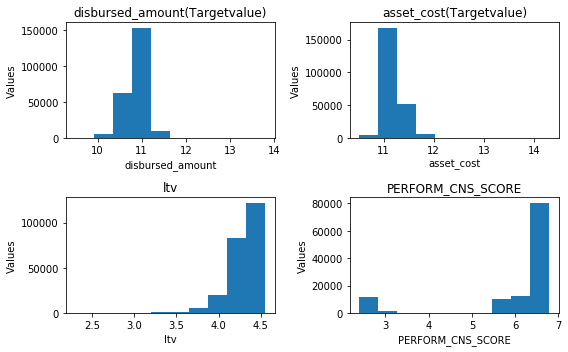

<Figure size 1440x720 with 0 Axes>

In [27]:
#Balanced Distribution
count=0
fig, axs = plt.subplots(2, 2, tight_layout=True,figsize=(8,5)) 
plt.figure(figsize=(20,10))
for i in range(2):
    for j in range(2):
        if((hist_Columns[count]=='disbursed_amount') or (hist_Columns[count]=='asset_cost')):
            axs[i,j].hist(np.log(srcdf[hist_Columns[count]]))
            axs[i,j].set(title = hist_Columns[count]+'(Targetvalue)', xlabel= hist_Columns[count],ylabel='Values')
            count+=1
        else:
            axs[i,j].hist(np.log(srcdf[srcdf[hist_Columns[count]]!=0][hist_Columns[count]]))
            axs[i,j].set(title = hist_Columns[count], xlabel= hist_Columns[count],ylabel='Values')
            count+=1

In [28]:
srcdf.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


[Text(0, 0.5, 'Total asset value'),
 Text(0.5, 0, 'Disbursed loan amount'),
 Text(0.5, 1.0, 'disbursed_amount vs asset_cost')]

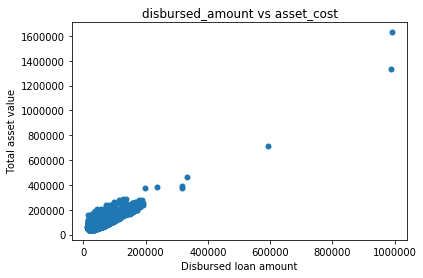

In [29]:
sns.scatterplot(x="disbursed_amount", y="asset_cost",
                sizes=(1, 8), linewidth=0,
                data=srcdf).set(title="disbursed_amount vs asset_cost",xlabel="Disbursed loan amount", ylabel="Total asset value")

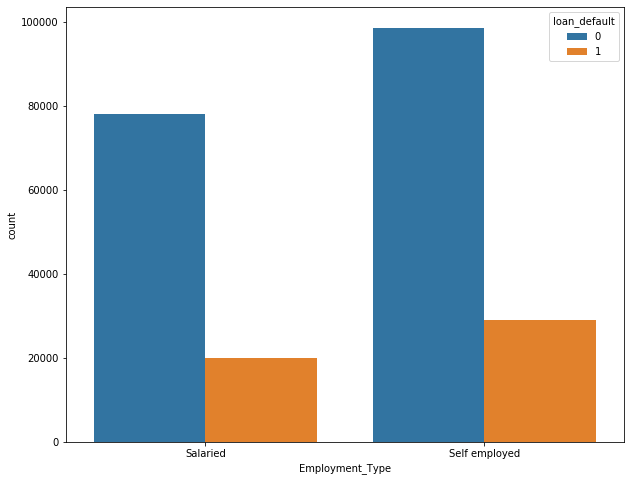

In [231]:
fig = plt.figure(figsize=(10,8))
sns.countplot(x='Employment_Type',hue='loan_default', data=srcdf)

In [31]:
df_cont = pd.DataFrame()

In [32]:
df_cont['disbursed_amount'] = srcdf['disbursed_amount']
df_cont['asset_cost'] = srcdf['asset_cost']
df_cont['ltv'] = srcdf['ltv']

In [33]:
df_cont.head()

,disbursed_amount,asset_cost,ltv
0,50578,58400,89.55
1,47145,65550,73.23
2,53278,61360,89.63
3,57513,66113,88.48
4,52378,60300,88.39


In [34]:
srcdf.Employment_Type.value_counts()

Self employed    127635
Salaried          97858
Name: Employment_Type, dtype: int64

In [35]:
df_cont['Employment_Type'] = srcdf['Employment_Type']

## Change the salary type into 0 and 1 as a categorical variable using Ordinal encoder

In [36]:
from sklearn.preprocessing import OrdinalEncoder

In [37]:
oe = OrdinalEncoder()
tmp_employment_type = df_cont['Employment_Type']
nonull = np.array(df_cont['Employment_Type'].dropna())

In [38]:
encoded_values = oe.fit_transform(nonull.reshape(-1,1))

In [39]:
tmp_employment_type[tmp_employment_type.notnull()] = np.squeeze(encoded_values)

In [40]:
df_cont['Employment_Type'] = tmp_employment_type

In [41]:
df_cont.Employment_Type.value_counts()

1.0    127635
0.0     97858
Name: Employment_Type, dtype: int64

In [42]:
df_cont.Employment_Type.isnull().sum()

7661

In [43]:
tmpdf = pd.DataFrame(srcdf.iloc[:,[13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40]])

In [44]:
df_cont = pd.concat([df_cont,tmpdf],sort=False,axis=1)

In [45]:
df_cont.isnull().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
Employment_Type                        7661
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS                         0
PRI_CURRENT_BALANCE                       0
PRI_SANCTIONED_AMOUNT                     0
PRI_DISBURSED_AMOUNT                      0
SEC_NO_OF_ACCTS                           0
SEC_ACTIVE_ACCTS                          0
SEC_OVERDUE_ACCTS                         0
SEC_CURRENT_BALANCE                       0
SEC_SANCTIONED_AMOUNT                     0
SEC_DISBURSED_AMOUNT            

In [46]:
tmpcolumns = list(df_cont.columns)

In [47]:
from fancyimpute import IterativeImputer as MICE
from sklearn.impute import KNNImputer

Using TensorFlow backend.


## Need to round of the values. By defalut KNN Imputer will give float variables. As Our Category contains 0's and 1's We have to round up the imputed values

In [48]:
#df_cont = pd.DataFrame(MICE().fit_transform(df_cont.astype(str)),columns=tmpcolumns)
imputer = KNNImputer(n_neighbors=5)
df_cont = pd.DataFrame(np.round(imputer.fit_transform(df_cont)),columns=tmpcolumns)

In [49]:
df_cont.Employment_Type.value_counts()

1.0    132584
0.0    100570
Name: Employment_Type, dtype: int64

In [50]:
X = df_cont.drop(['disbursed_amount'],axis=1)

In [51]:
y= df_cont['disbursed_amount']

## Successfully removed the null values and done with encoding as well. We can start applying Regression models

In [52]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import utils
import numpy as np
from sklearn import svm
from sklearn import model_selection,metrics
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [324]:
def fit_ml_algo(algo, X_train, y_train, X_test, y_test, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv)
    # Cross-validation accuracy metric
    scores = cross_val_score(algo,X_train,y_train, cv=cv)
    acc_cv = round(scores.mean()* 100, 2)
    
    #R-2 square value
    R2_value = round(metrics.r2_score(y_train, train_pred) * 100 ,2)
    
    y_pred = model.predict(X_test)
    #MAE & RMSE
    MAE = round(metrics.mean_absolute_error(y_test, y_pred)*100,2)
    RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))*10,2)
    return train_pred, acc, acc_cv, R2_value,MAE,RMSE

## Linear Regression

In [325]:
reg_pred,reg_acc,reg_acc_cv,reg_r2_value, MAE_lm, RMSE_lm = fit_ml_algo(LinearRegression(),X_train,y_train,X_test,y_test,10)

In [326]:
print("Accuracy of Linear Regression : ",reg_acc)
print("Cross validation accuracy with cv=10 : ",reg_acc_cv)
print ("R-Square Accuracy:", reg_r2_value)
print("MAE : ",MAE_lm)
print ("RMSE :", RMSE_lm)

Accuracy of Linear Regression :  96.68
Cross validation accuracy with cv=10 :  96.65
R-Square Accuracy: 96.68
MAE :  147747.99
RMSE : 23094.37


## Random Forest Regressor

In [127]:
# Find an optimised max_leaf_nodes
def findNode(max_num,X_train,y_train):
    rf = RandomForestRegressor(random_state=1,max_leaf_nodes=max_num)
    rf.fit(X_train,y_train)
    accuracy = round(rf.score(X_train,y_train)*100,2)
    return accuracy

In [130]:
leaf_node_accuracy = {"Leaf_Node":"Accuracy %"}
leaf_node_list=[1000,5000,10000,20000,30000]
for i in leaf_node_list:
    leaf_node_accuracy.update({i:findNode(i,X,y)})

leaf_node_accuracy

{'Leaf_Node': 'Accuracy %',
 1000: 99.5,
 5000: 99.6,
 10000: 99.66,
 20000: 99.73,
 30000: 99.76}

In [255]:
X.head()

,asset_cost,ltv,Employment_Type,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,loan_default
0,58400.0,90.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65550.0,73.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,598.0,1.0,1.0,1.0,27600.0,50200.0,50200.0,0.0,0.0,0.0,0.0,0.0,0.0,1991.0,0.0,0.0,1.0,0.0,1.0
2,61360.0,90.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,66113.0,88.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,305.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,1.0,1.0
4,60300.0,88.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [257]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [259]:
X_train.shape,X_test.shape

((186523, 28), (46631, 28))

In [260]:
rf = RandomForestRegressor(random_state=1)

In [261]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [262]:
y_pred = rf.predict(X_test)

In [266]:
y_pred.shape,y_test.shape

((46631,), (46631,))

In [270]:
print("Accuracy:",round(rf.score(X_test, y_test)*100,2))

Accuracy: 99.32


In [271]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [329]:
CV_rf = round(np.mean(cross_val_score(rf, X_test, y_test, cv=10))*100,2)

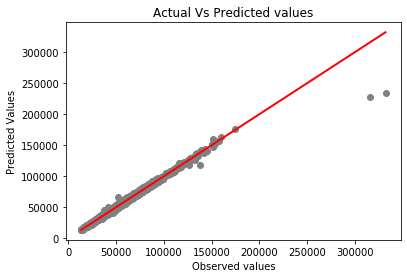

In [278]:
plt.scatter(y_test,y_pred,  color='gray')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()] ,color='red', linewidth=2)
plt.title('Actual Vs Predicted values')
plt.xlabel('Observed values')
plt.ylabel('Predicted Values')
plt.show()

In [279]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [280]:
rf.estimators_

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1791095845, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2135392491, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impur

In [281]:
rf.feature_importances_

array([6.16666063e-01, 3.79445946e-01, 2.09473772e-04, 0.00000000e+00,
       7.31342742e-05, 1.20832511e-04, 7.50381607e-05, 3.54522521e-05,
       3.48534117e-06, 5.17402124e-04, 5.02387252e-04, 3.70486210e-04,
       2.08057887e-04, 2.76414943e-04, 2.35660846e-04, 2.49537741e-04,
       1.45003137e-05, 5.04932095e-06, 3.32016548e-06, 5.73215041e-06,
       6.24429607e-06, 5.75844508e-06, 4.59836211e-04, 6.60432684e-06,
       1.15150747e-04, 3.85537522e-05, 2.25983122e-04, 1.23894889e-04])

In [355]:
features_df = pd.DataFrame({'Feature_Names':X_train.columns,'Feature_Importances':rf.feature_importances_})

In [360]:
cm = sns.light_palette("green", as_cmap=True)

s = features_df.style.background_gradient(cmap=cm)
s

,Feature_Names,Feature_Importances
0,asset_cost,0.616666
1,ltv,0.379446
2,Employment_Type,0.000209474
3,MobileNo_Avl_Flag,0
4,Aadhar_flag,7.31343e-05
5,PAN_flag,0.000120833
6,VoterID_flag,7.50382e-05
7,Driving_flag,3.54523e-05
8,Passport_flag,3.48534e-06
9,PERFORM_CNS_SCORE,0.000517402


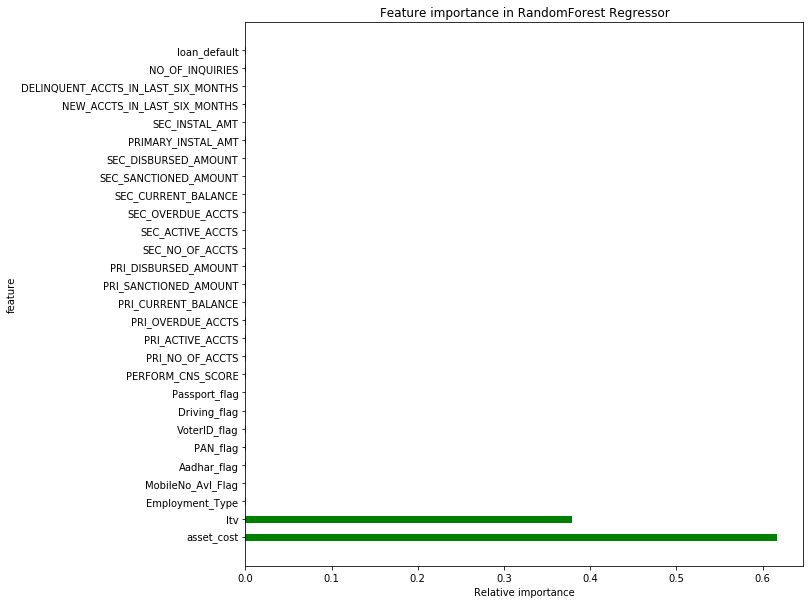

<Figure size 720x720 with 0 Axes>

In [313]:
col = X_train.columns
#modelname.feature_importance_
y = rf.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Regressor')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(10,10))
fig.set_size_inches(10, 10, forward=True)

In [319]:
MAE_rf = round(metrics.mean_absolute_error(y_test, y_pred)*100,2)
RMSE_rf = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))*10,2)
Accuracy_rf = round(rf.score(X_test,y_test)*100,2)
print('Mean Absolute Error:', MAE_rf)
print('Root Mean Squared Error:', RMSE_rf)
print('Accuracy : ', Accuracy_rf)

Mean Absolute Error: 62701.86
Root Mean Squared Error: 10375.62
Accuracy :  99.32


In [332]:
final_res_df = pd.DataFrame({'ML Models' : ['Random Forest Regressor','Multiple Linear Regression'],
              'Accuracy in %' : [Accuracy_rf,reg_acc],
             'MAE':[MAE_rf,MAE_lm],
             'RMSE':[RMSE_rf,RMSE_lm],
             'CV Score in %':[CV_rf,reg_acc_cv]})

In [354]:
import seaborn as sns

cm = sns.light_palette("violet", as_cmap=True)

s = final_res_df.style.background_gradient(cmap=cm)
s

,ML Models,Accuracy in %,MAE,RMSE,CV Score in %
0,Random Forest Regressor,99.32,62701.9,10375.6,99.39
1,Multiple Linear Regression,96.68,147748,23094.4,96.65
